Run 1: Using the topic_distribution and topic labels generated from running across 44 topics across initial 200 documents

In [ ]:
pip install -U spacy


In [ ]:
pip install transformers spacy-transformers


Retrieve top ten topics

In [1]:

import json

# Open the JSON file and load it into a variable
with open('topic_distribution_test.json', 'r') as file:
    topic_distribution = json.load(file)

# Sort the dictionary by values (topic scores) in descending order
sorted_topics = sorted(topic_distribution.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 topics
top_ten_topics = [topic for topic, value in sorted_topics[:10]]

print(top_ten_topics)

['High Court Judgments and Appeals', 'Legal Parties and Applications', 'Defendant Evidence and Legal Claims', 'Court Evidence and Defendant Cases', 'Defendant Charges and Legal Applications', 'Appeals and Defendant Claims', 'Legal Applications and Arbitration', 'Legal Rights and Court Issues', 'Court Agreements and Plaintiff Claims', 'Court Decisions and Company Matters']


Load document-topic assignment

In [4]:

with open('labeled_document_topic_test.json', 'r') as file:
    document_topic = json.load(file)

# Step 3: Organize documents under their respective top ten topics
topics_documents = {topic: [] for topic in top_ten_topics}  # Initialize a dictionary for the top ten topics

for doc_id, topic in document_topic.items():
    if topic in top_ten_topics:
        topics_documents[topic].append(doc_id)  # Add document under its topic

# Print the categorized documents
for topic, docs in topics_documents.items():
    print(f"{topic}: {docs}")

High Court Judgments and Appeals: ['Document 1', 'Document 26', 'Document 49', 'Document 58', 'Document 76', 'Document 90', 'Document 92', 'Document 111', 'Document 113', 'Document 129', 'Document 130', 'Document 131', 'Document 137', 'Document 160', 'Document 161', 'Document 164', 'Document 174', 'Document 182', 'Document 196', 'Document 239', 'Document 269', 'Document 290', 'Document 291', 'Document 294', 'Document 298', 'Document 304', 'Document 315', 'Document 334', 'Document 378', 'Document 394', 'Document 395', 'Document 413', 'Document 414', 'Document 416', 'Document 417', 'Document 424', 'Document 432', 'Document 449', 'Document 462', 'Document 475', 'Document 476', 'Document 489', 'Document 492', 'Document 502', 'Document 505', 'Document 515', 'Document 523', 'Document 536', 'Document 554', 'Document 562', 'Document 572', 'Document 589', 'Document 590', 'Document 597', 'Document 609', 'Document 611', 'Document 617', 'Document 621', 'Document 630', 'Document 651', 'Document 659

In [8]:
import pandas as pd
import spacy
import spacy_transformers

# Load the CSV file
df = pd.read_csv("../sectionized_data.csv")
df = df.dropna()

# Load the NER file
ner_model_path = '../model_ner'
nlp = spacy.load(ner_model_path)

/opt/homebrew/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_legal_ner_trf' (3.2.0) was trained with spaCy v3.2.2 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/opt/homebrew/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/lib/python3.11/site-packages/spacy_transformers/layers/hf_shim.py:137: UserWarning: Error loading saved torch state_dict with strict=True, likely due to differences between 'transformers' versions. Attempting to load with strict=False as a fallback...

If you see errors or degraded performance

In [9]:
from collections import Counter

def get_document_text(doc_id):  
    index = int(doc_id.split(' ')[1]) 
    return df.iloc[index]['Body']

EXTRACTING ONLY THE COURT LABEL

In [29]:
all_topics_output = []

for top_topic in top_ten_topics:
    court_entities = []
    for doc_id in topics_documents[top_topic]:
        doc_text = get_document_text(doc_id)
        doc = nlp(doc_text)
        court_entities.extend([ent.text for ent in doc.ents if ent.label_ == "COURT"])

    # Find the most frequently occurring entities for the current topic
    court_entities_counts = Counter(court_entities)
    if court_entities_counts:
        max_count = max(court_entities_counts.values())
        # Keep only entities with the highest count
        most_frequent_entities = {entity: count for entity, count in court_entities_counts.items() if count == max_count}
    else:
        most_frequent_entities = {}

    # Append to the overall output
    all_topics_output.append({
        "Topic": top_topic,
        "Most Frequent COURT Entities": most_frequent_entities
    })

# Format for output
output_structure = {
    "Topics": all_topics_output
}

output_file_path = 'top_ten_topics_most_frequent_court_entities.json'

# Write the formatted data to a JSON file
with open(output_file_path, 'w') as file:
    json.dump(output_structure, file, indent=2)

print(f"Data written to {output_file_path}")


/opt/homebrew/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_legal_ner_trf' (3.2.0) was trained with spaCy v3.2.2 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/opt/homebrew/lib/python3.11/site-packages/spacy_transformers/layers/hf_shim.py:137: UserWarning: Error loading saved torch state_dict with strict=True, likely due to differences between 'transformers' versions. Attempting to load with strict=False as a fallback...

If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current 'transformers' and 'spacy-transformers' versions. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Data written to top_ten_topics_most_frequent_court_entities.json


In [25]:
input_file_path = 'top_ten_topics_most_frequent_court_entities.json'

# Load the JSON data from the file
with open(input_file_path, 'r') as file:
    data = json.load(file)

print("Top COURT Entities for the top ten topics")

for topic_info in data["Topics"]:
    topic_name = topic_info["Topic"]
    entities_str = ', '.join([f"{entity} ({count})" for entity, count in topic_info["Most Frequent COURT Entities"].items()])
    print(f"{topic_name}: [{entities_str}]")


Top COURT Entities for the top ten topics
High Court Judgments and Appeals: [Siglap Court (3), Supreme Court (3), Singapore Courts (3)]
Legal Parties and Applications: [KLHC (12)]
Defendant Evidence and Legal Claims: [IAC (4)]
Court Evidence and Defendant Cases: [IAC (4), Supreme Court of Singapore (4)]
Defendant Charges and Legal Applications: [IAC (2), Paris Commercial Court (2), RCA (2)]
Appeals and Defendant Claims: [JVA (8)]
Legal Applications and Arbitration: [IAC (4)]
Legal Rights and Court Issues: [LA (3)]
Court Agreements and Plaintiff Claims: [DT (4)]
Court Decisions and Company Matters: [IJ (2)]


EXTRACT ACROSS ALL NER LEGAL ENTITIES

In [37]:
all_topics_output_for_all_entities = []

specified_labels = ["PRECEDENT", "LAWYER", "JUDGE", "RESPONDENT", "GPE",
                    "OTHER_PERSON", "PROVISION", "ORG", "PETITIONER",
                    "WITNESS", "COURT", "STATUTE"]

for top_topic in top_ten_topics:
    entities_by_label = {label: [] for label in specified_labels}
    for doc_id in topics_documents[top_topic]:
        doc_text = get_document_text(doc_id)
        doc = nlp(doc_text)
        for ent in doc.ents:
            if ent.label_ in specified_labels:
                entities_by_label[ent.label_].append(ent.text)
    
    # For each label, find the most frequent entity/entities
    most_frequent_entities_by_label = {
        label: Counter(entities).most_common(1) for label, entities in entities_by_label.items() if entities
    }

    # Append to the overall output
    all_topics_output_for_all_entities.append({
        "Topic": top_topic,
        "Most Frequent Entities by Label": most_frequent_entities_by_label
    })

# Format for output
output_structure = {
    "Topics": all_topics_output_for_all_entities
}

output_file_path = 'top_ten_topics_most_frequent_entities_by_label.json'

# Write the formatted data to a JSON file
with open(output_file_path, 'w') as file:
    json.dump(output_structure, file, indent=2)

print(f"Data written to {output_file_path}")

Data written to top_ten_topics_most_frequent_entities_by_label.json


In [45]:
all_entities_input_file_path = 'top_ten_topics_most_frequent_entities_by_label.json'

with open(all_entities_input_file_path, 'r') as file:
    data = json.load(file)

print("Top Entities by Specified Labels for the Top Ten Topics")

for topic_info in data["Topics"]:
    topic_name = topic_info["Topic"]
    print(f"\n{topic_name}:")
    for label, entities in topic_info["Most Frequent Entities by Label"].items():
        entities_str = ', '.join([f"{ent[0]} ({ent[1]})" for ent in entities])
        print(f"  {label}: {entities_str}")

Top Entities by Specified Labels for the Top Ten Topics

High Court Judgments and Appeals:
  PRECEDENT: Dodds v Dodds (4)
  LAWYER: Yeo Alvin (2)
  JUDGE: Chan (5)
  RESPONDENT: Liberty Engineering Group Pte Ltd (3)
  GPE: Singapore (65)
  OTHER_PERSON: Eugene (70)
  PROVISION: s 73B (21)
  ORG: LPG (66)
  PETITIONER: TNK (4)
  WITNESS: TNK (2)
  COURT: Siglap Court (3)
  STATUTE: IRDA (35)

Legal Parties and Applications:
  PRECEDENT: Mercator & Noordstar NV v Velstra Pte Ltd (2)
  LAWYER: Tay" (2)
  JUDGE: Fox (2)
  RESPONDENT: Credit Suisse AG (4)
  GPE: Singapore (19)
  OTHER_PERSON: Peh (48)
  PROVISION: Suit 267 (11)
  ORG: LPG (93)
  PETITIONER: Hyflux Ltd (2)
  WITNESS: Ramalingam (8)
  COURT: KLHC (12)
  STATUTE: SOPA (24)

Defendant Evidence and Legal Claims:
  PRECEDENT: Oro Negro Drilling Pte Ltd and others v Integradora de Servicios Petroleros Oro Negro SAPI de CV and others (2)
  LAWYER: Song Yihang (1)
  JUDGE: Choo Han Teck (3)
  RESPONDENT: PayPal Pte Ltd (1)
  GPE: Si

Save it into a json file


In [46]:

# Initialize a list to hold the formatted data
formatted_data = []

for topic_info in data["Topics"]:
    topic_name = topic_info["Topic"]
    topic_dict = {"Topic": topic_name, "Entities": {}}
    
    for label, entities in topic_info["Most Frequent Entities by Label"].items():
        # Create a string representation for each entity and its count
        entities_dict = {ent[0]: ent[1] for ent in entities}
        topic_dict["Entities"][label] = entities_dict
    
    formatted_data.append(topic_dict)

# Specify the new output file path for the formatted data
output_file_path = 'formatted_top_ten_topics_most_frequent_entities_by_label.json'

# Write the formatted data to a JSON file
with open(output_file_path, 'w') as file:
    json.dump(formatted_data, file, indent=2)

print(f"Data written to {output_file_path}")


Data written to formatted_top_ten_topics_most_frequent_entities_by_label.json


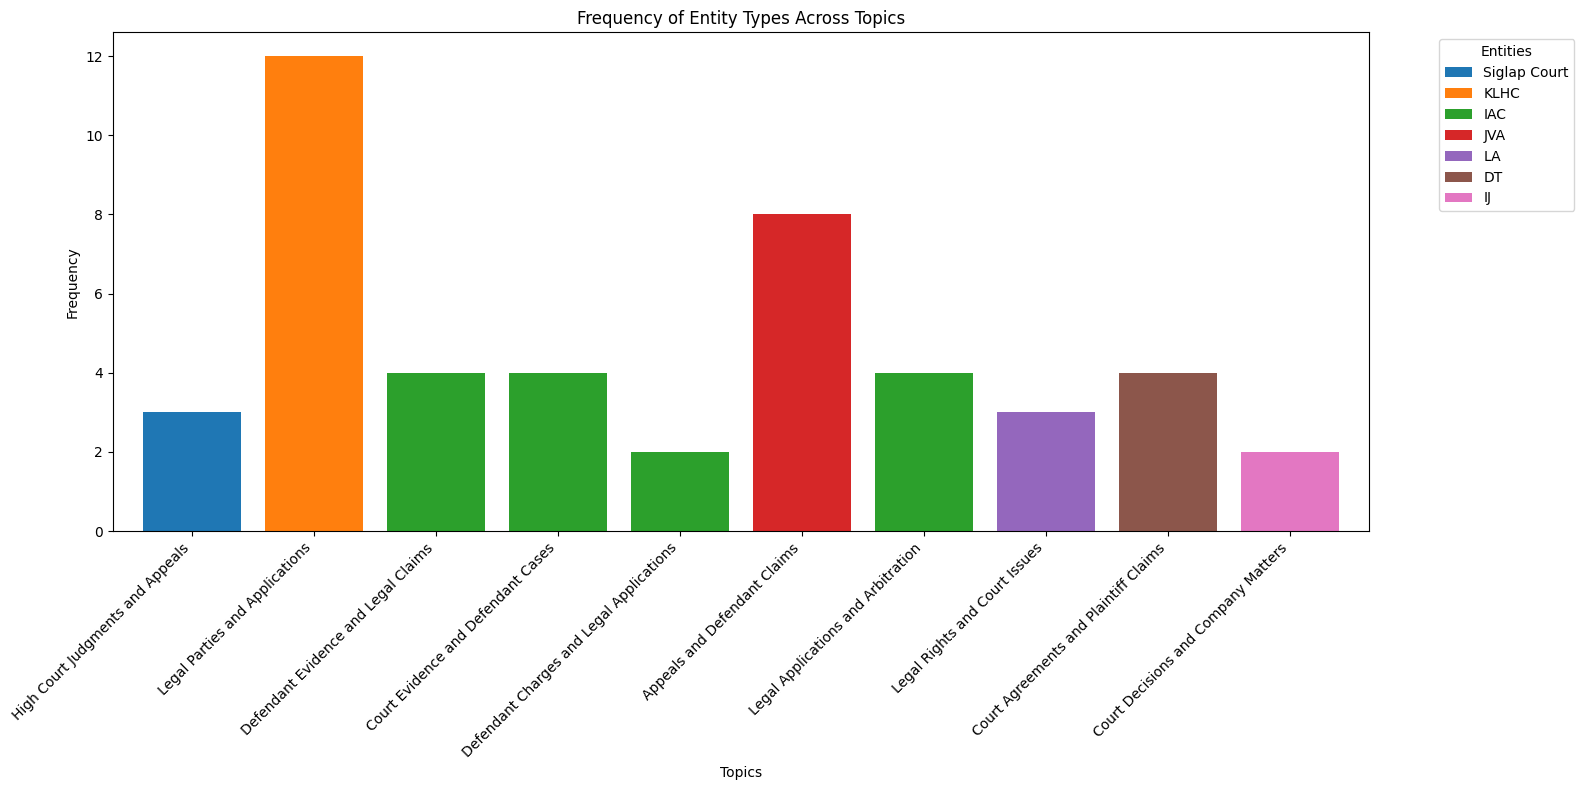

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import json

formatted_all_entities_file_path = 'formatted_top_ten_topics_most_frequent_entities_by_label.json'

with open(formatted_all_entities_file_path, 'r') as file:
    data_json = json.load(file)

# Function to aggregate entity frequencies across topics for a specified entity type
def aggregate_entities(data_json, entity_type):
    topics = []
    entity_aggregation = {}
    
    for topic_info in data_json:
        topic = topic_info['Topic']
        topics.append(topic)
        entities = topic_info['Entities'].get(entity_type, {})
        
        for entity, frequency in entities.items():
            if entity not in entity_aggregation:
                entity_aggregation[entity] = [0] * len(data_json)  # Initialize with zeros
            entity_aggregation[entity][topics.index(topic)] = frequency
            
    return topics, entity_aggregation

# Function to plot all entities of a type across all topics in one graph
def plot_aggregated_entities(topics, entity_aggregation):
    # Creating a DataFrame from the aggregated data
    df = pd.DataFrame(entity_aggregation, index=topics)
    
    # Plot
    ax = df.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
    ax.set_title("Frequency of Entity Types Across Topics")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Topics")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    plt.legend(title="Entities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Specify the entity type you're interested in
entity_type = 'COURT'  # others: ORG, COURT

topics, entity_aggregation = aggregate_entities(data_json, entity_type)
plot_aggregated_entities(topics, entity_aggregation)
plt.show()